In [2]:
#detection of survival of people from titanic disaster 

In [1]:
#importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the data set

In [2]:
df1 = pd.read_csv("C:\\Users\\Pinky\\Desktop\\python\\data set\\titanic\\train.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the info of the data set

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#checking the tail of the data set

In [6]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#checking if there are any null values

In [4]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#checking the shape of the data frame

In [5]:
df1.shape

(891, 12)

In [8]:
#droping the columns of cabin,passengerid,name because they are object type and our model takes only numeric values

In [7]:
df1.drop(["Cabin","PassengerId","Name"],axis=1,inplace=True)

In [8]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [10]:
df1.drop("Ticket",axis = 1,inplace = True)

In [11]:
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [9]:
#again checking the info of the data frame

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
#sex column is object type we need to convert it to numeric type

In [15]:
sex = pd.get_dummies(df1["Sex"],drop_first = True)

In [11]:
#joining sex column with data frame

In [16]:
pd.concat([df1,sex],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,NaN,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,1


In [17]:
df1.drop("Sex",axis=1,inplace = True)

In [18]:
df1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C


In [12]:
#filling the nan values in the age column by taking the mean of whole cloumn

In [22]:
df1["Age"] = df1["Age"].fillna(np.mean(df1["Age"]))

In [13]:
#again checking the info

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [24]:
df1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C


In [27]:
df1.dropna(inplace = True)

In [28]:
df1.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
#doing same with embark column as well

In [30]:
embark = pd.get_dummies(df1["Embarked"],drop_first=True)

In [35]:
df1 = pd.concat([df1,embark],axis=1)
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [32]:
df1.drop("Embarked",axis=1,inplace=True)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Q           889 non-null uint8
S           889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 52.1 KB


In [39]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [47]:
#df1.drop("Q",axis=1,inplace=True)
df1.drop("S",axis=1,inplace = True)

In [48]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
#joining embark with data frame

In [49]:
df1 = pd.concat([df1,embark],axis=1)

In [50]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,0,1


In [16]:
#plotting the data

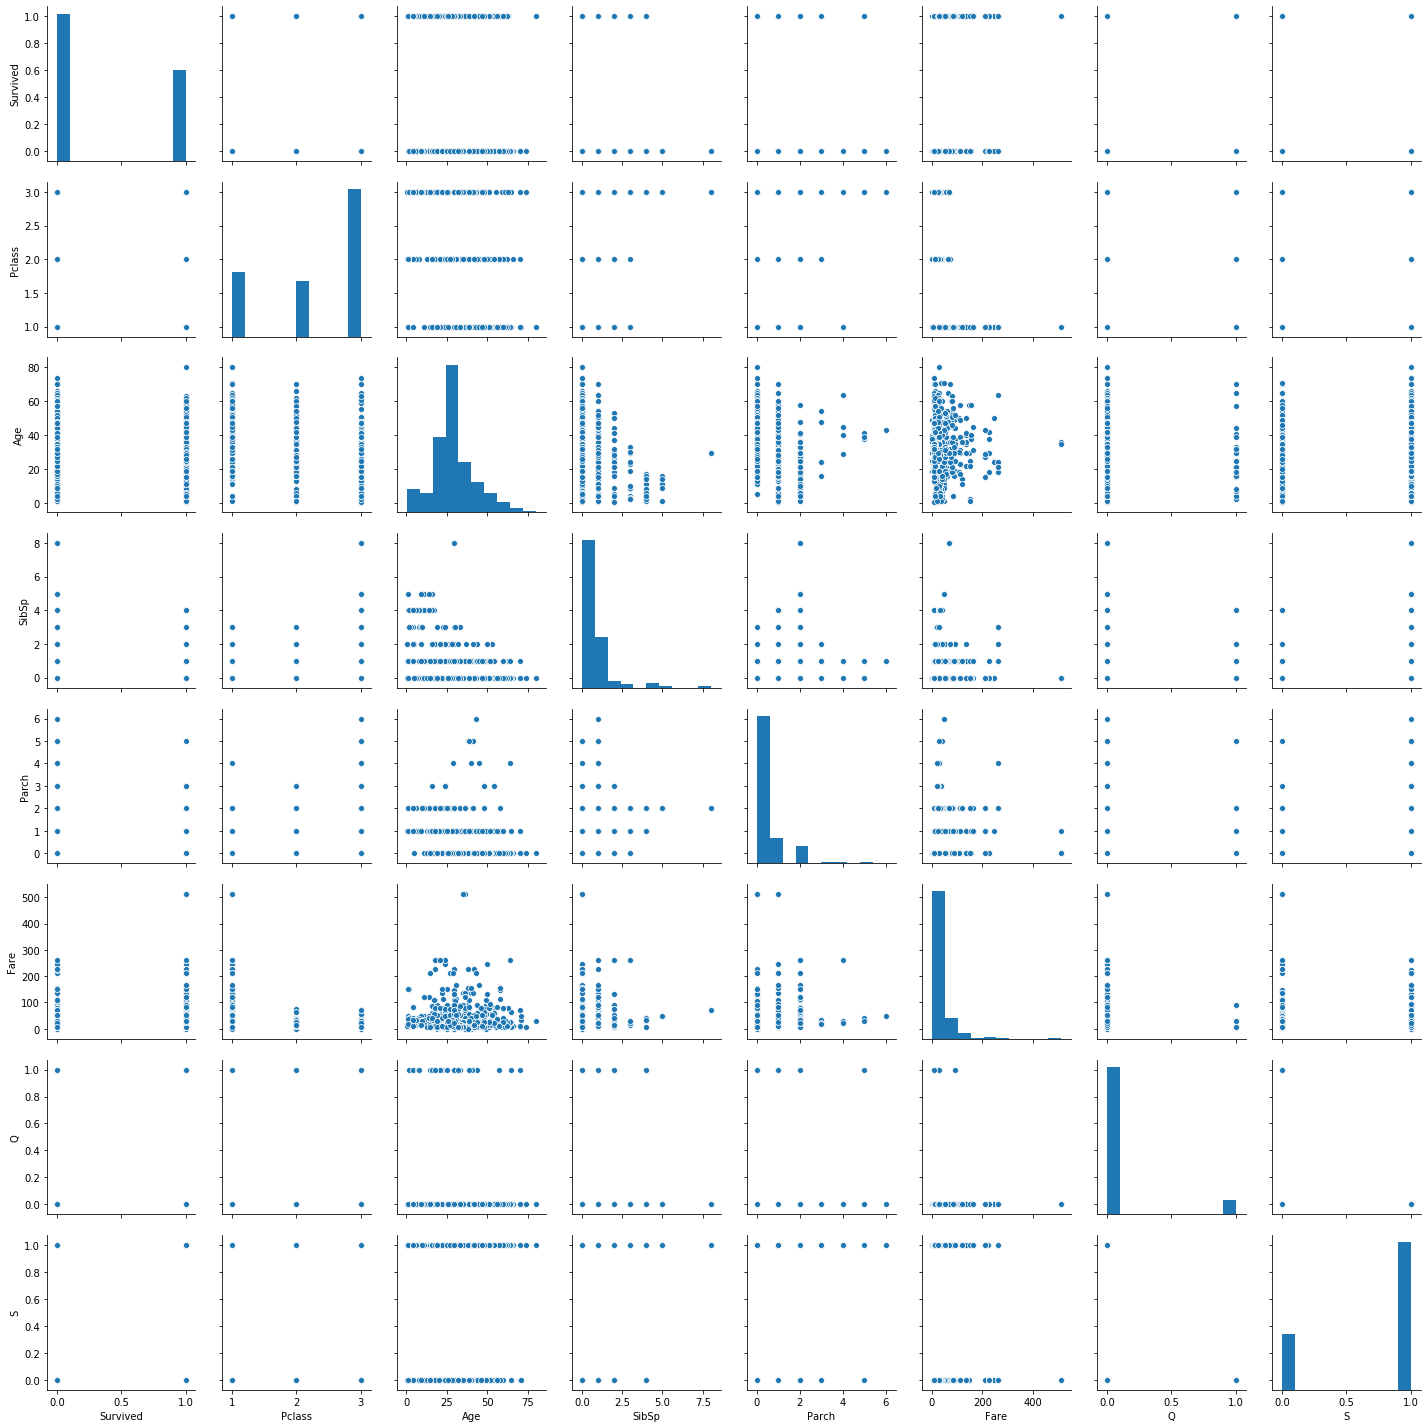

In [51]:
sns.pairplot(df1)

In [17]:
#checking the correlation

In [52]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,0.220558,0.076466
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.012823,-0.021589
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,-0.026692,0.069438
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,-0.081585,0.061512
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,-0.116684,-0.163758
Q,0.004536,0.220558,-0.012823,-0.026692,-0.081585,-0.116684,1.000000,-0.499261
S,-0.151777,0.076466,-0.021589,0.069438,0.061512,-0.163758,-0.499261,1.000000


In [18]:
#plotting the correlation

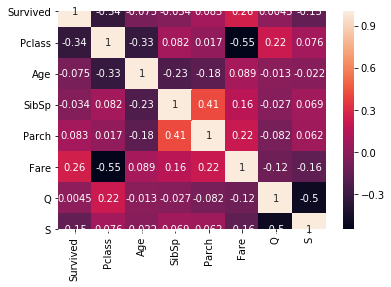

In [57]:
sns.heatmap(df1.corr(),annot=True)

Text(0, 0.5, 'Survived')

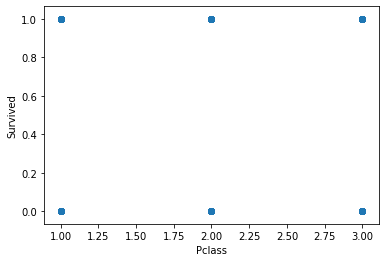

In [58]:
plt.scatter(df1["Pclass"],df1["Survived"])
plt.xlabel("Pclass")
plt.ylabel("Survived")

In [59]:
df1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0


In [19]:
#splitting the data into two variables (independent and dependent)

In [60]:
x = df1.drop("Survived",axis=1)
y = df1["Survived"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [64]:
x_train.shape

(622, 7)

In [21]:
#building the logestic regression model 

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [22]:
#trainig the model

In [66]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#making the predictions

In [67]:
predictions = model.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,predictions))
print("..."*20)
print(confusion_matrix(y_test,predictions))
print("..."*20)
print(classification_report(y_test,predictions))

0.7265917602996255
............................................................
[[147  20]
 [ 53  47]]
............................................................
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       167
           1       0.70      0.47      0.56       100

    accuracy                           0.73       267
   macro avg       0.72      0.68      0.68       267
weighted avg       0.72      0.73      0.71       267



In [24]:
#our accuracy is 72.6%, lets check if other models do better

In [71]:
from sklearn.tree import DecisionTreeClassifier

Tree_model = DecisionTreeClassifier()

In [25]:
#building the decision tree model and trainig it

In [73]:
Tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
#making predictions

In [75]:
predict = Tree_model.predict(x_test)

In [76]:
print(accuracy_score(y_test,predict))
print("..."*20)
print(confusion_matrix(y_test,predict))
print("..."*20)
print(classification_report(y_test,predict))

0.6254681647940075
............................................................
[[122  45]
 [ 55  45]]
............................................................
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       167
           1       0.50      0.45      0.47       100

    accuracy                           0.63       267
   macro avg       0.59      0.59      0.59       267
weighted avg       0.62      0.63      0.62       267



In [27]:
#our accuracy is 65.5% now decision tree model could'nt do better than logistic model lets check if random forest does better

In [89]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators = 10)

In [28]:
#building random forest model and trainig it

In [90]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
#making predictions

In [91]:
forest_predict = forest_model.predict(x_test)

In [92]:
print(accuracy_score(y_test,forest_predict))
print("..."*20)
print(confusion_matrix(y_test,forest_predict))
print("..."*20)
print(classification_report(y_test,forest_predict))

0.6441947565543071
............................................................
[[121  46]
 [ 49  51]]
............................................................
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       167
           1       0.53      0.51      0.52       100

    accuracy                           0.64       267
   macro avg       0.62      0.62      0.62       267
weighted avg       0.64      0.64      0.64       267



In [ ]:
#again our accuracy score is 64.4 which is not better than logistic model

In [30]:
#conclusion : our logistic model did better than decision tree model and random forest model
#so we will consider our logistic model